# Spam Mail Classifier #

By Adarsh Mishra

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# pickle library for saving the model
import pickle

# RE Library for Regular Expression
import re

# NLTK Library
import nltk
nltk.download('stopwords') # Downloading the Stopwords

# for removing the stopwords in the text
from nltk.corpus import stopwords

# for stemming the words
from nltk.stem.porter import PorterStemmer

# for Bagging of Words and Vectorizing it
from sklearn.feature_extraction.text import CountVectorizer

# Train_Test_Split for splitting the Dataset
from sklearn.model_selection import train_test_split

# Decision Tree Classifier, Logistic Regression and Multinomial Naïve Bayes
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Accuracy Score and Confusion Matrix is for Analysis of Models
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

[nltk_data] Downloading package stopwords to /home/adarsh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Reading csv dataset using pandas ####

In [78]:
spam = pd.read_csv('../data/spam.csv',encoding='ISO-8859-1')

#### Checking for null values in data ####

In [79]:
spam.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

There is no null value hence data cleaning is not required

#### Printing some data for Reference ####

In [80]:
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [81]:
spam.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


#### Changing the column name to label and message for better understanding ####

In [82]:
spam = spam[['v1', 'v2']]
spam.columns = ['label', 'message']
spam.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### Doing some analysis on data ####

In [83]:
spam.shape

(5572, 2)

In [84]:
spam.groupby('label').size()

label
ham     4825
spam     747
dtype: int64

### Plotting the label dataset ###

<Axes: xlabel='label'>

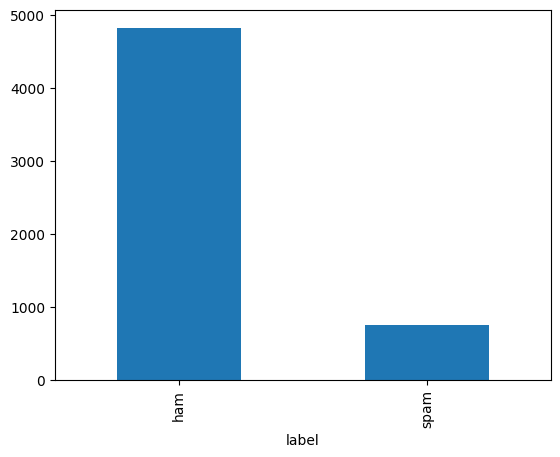

In [85]:
spam['label'].value_counts().plot(kind='bar')

#### Preprocessing the text in dataset ####

In [86]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(spam)):
    review = re.sub('[^a-zA-Z]', ' ', spam['message'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

# Printing the first 5 values in the corpus list
corpus[1:6]

['ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv']

#### creating bag of words model ####

In [87]:
cv = CountVectorizer(max_features = 4000)

# saving the vectorizer in a pickle file
import pickle
with open("cv.pkl", "wb") as vec_file:
    pickle.dump(cv, vec_file)
X = cv.fit_transform(corpus).toarray()
Y = pd.get_dummies(spam['label'])
Y = Y.iloc[:, 1].values

#### Splitting the data for training and testing ####

In [88]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=42)

# Training the Models

In [89]:
# Model 1 - Logistic Regression
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train, Y_train)

# Model 2 - Decision Tree Classifier
model2 = DecisionTreeClassifier()
model2.fit(X_train, Y_train)

# Model 3 - Multinomial Naïve Bayes
model3 = MultinomialNB()
model3.fit(X_train, Y_train)

MultinomialNB()

#### Making Predictions

In [90]:
# Predictions
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)

# Evaluation of Models 

In [102]:
print("Logistic Regression")
print("Accuracy:", accuracy_score(Y_test, pred1))

print("\nDecision Tree Classifier")
print("Accuracy:", accuracy_score(Y_test, pred2))

print("\nMultinomial Naïve Bayes")
print("Accuracy:", accuracy_score(Y_test, pred3))

Logistic Regression
Accuracy: 0.97847533632287

Decision Tree Classifier
Accuracy: 0.9721973094170404

Multinomial Naïve Bayes
Accuracy: 0.9802690582959641


Logistic Regression
Confusion Matrix:
[[965   0]
 [ 24 126]]
Accuracy: 0.97847533632287
              precision    recall  f1-score   support

       False       0.98      1.00      0.99       965
        True       1.00      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



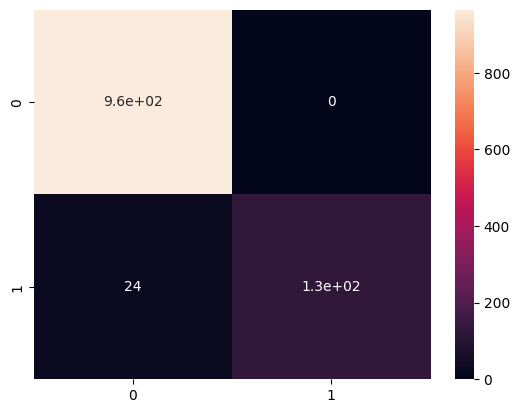

In [91]:
# Evaluate Logistic Regression
print("Logistic Regression")
print("Confusion Matrix:")
print(confusion_matrix(Y_test, pred1))
print("Accuracy:", accuracy_score(Y_test, pred1))
print(classification_report(Y_test, pred1))
sns.heatmap(confusion_matrix(Y_test, pred1), annot=True)
plt.show()


Decision Tree Classifier
Confusion Matrix:
[[956   9]
 [ 22 128]]
Accuracy: 0.9721973094170404
              precision    recall  f1-score   support

       False       0.98      0.99      0.98       965
        True       0.93      0.85      0.89       150

    accuracy                           0.97      1115
   macro avg       0.96      0.92      0.94      1115
weighted avg       0.97      0.97      0.97      1115



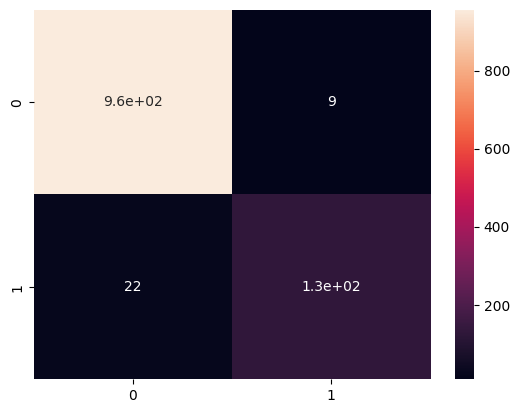

In [92]:
# Evaluate Decision Tree
print("\nDecision Tree Classifier")
print("Confusion Matrix:")
print(confusion_matrix(Y_test, pred2))
print("Accuracy:", accuracy_score(Y_test, pred2))
print(classification_report(Y_test, pred2))
sns.heatmap(confusion_matrix(Y_test, pred2), annot=True)
plt.show()


Multinomial Naïve Bayes
Confusion Matrix:
[[952  13]
 [  9 141]]
Accuracy: 0.9802690582959641
              precision    recall  f1-score   support

       False       0.99      0.99      0.99       965
        True       0.92      0.94      0.93       150

    accuracy                           0.98      1115
   macro avg       0.95      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



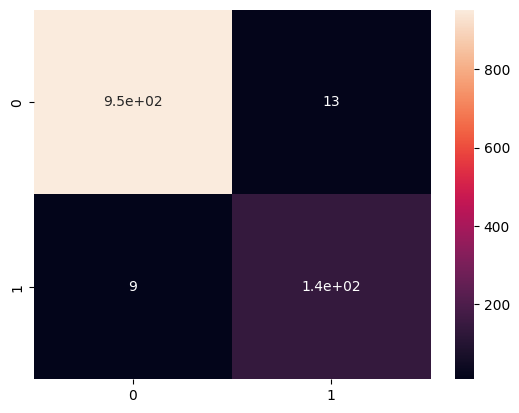

In [93]:
# Evaluate Multinomial Naïve Bayes
print("\nMultinomial Naïve Bayes")
print("Confusion Matrix:")
print(confusion_matrix(Y_test, pred3))
print("Accuracy:", accuracy_score(Y_test, pred3))
print(classification_report(Y_test, pred3))
sns.heatmap(confusion_matrix(Y_test, pred3), annot=True)
plt.show()

#### Saving the Models

In [94]:
# Save models
with open("LR.pkl", "wb") as f:
    pickle.dump(model1, f)
with open("DTC.pkl", "wb") as f:
    pickle.dump(model2, f)
with open("MNB.pkl", "wb") as f:
    pickle.dump(model3, f)

print("Saved Logistic Regression, Decision Tree, and Multinomial NB models")

Saved Logistic Regression, Decision Tree, and Multinomial NB models
